### Apsorpcija u kontinuumu (i u primeru linije) u realisticnom modelu atmosfere Sunca

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

default_figsize = [8,5]

In [2]:
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)

Danas radimo jednu praktičnu / numeričku vežbu. Radićemo sa poznatim
“FALC” modelom atmosfere sunce. Model atmosfere je u stvari tabela vred-
nosti raznih fizičkih parametara. Model se nalazi u fajlu “f alc 7 1.dat”. Svaka
vrsta sadrži vrednost parametera za jedan “sloj” atmosfere. Svaka kolona
sadrži vrednosti za jedan specifičan parametar. Za nas su važne sledeće
kolone:

• 0-ta kolona: Optička dubina u kontinuumu, u logaritamskoj skali.

• 1-a kolona: Visina u odnosu na “površinu” fotosfere.

• 2-a kolona: Temperatura

• 3-a kolona: Ukupan pritisak gasa

• 4-a kolona: Elektronski pritisak

Pažnja: sve jedinice su u tzv. CGS sistemu jedinica!

In [3]:
atmos = np.loadtxt("falc_71.dat",unpack=True, skiprows=1)
atmos.shape
#print (atmos[0])
logtau = atmos[0]
tau = 10. ** logtau

In [4]:
# Ovo je logaritam REFERENTNE opticke dubine. To je nasa nova vertikalna koordinata
# Ova referentna opticka dubina je opticka dubina koju su izracunali autori ovog modela
# (Fontenla et al. 1991) na osnovu neprozracnosti na talasnoj duzini 500nm

# Nama je malo prirodnije da koristimo fizicku visinu kao koordinatu, to ce biti 
# prva kolona 
#print (atmos[1])

# Zapamtite da je ovo u cm! 
# voleli bismo da radimo u km
z = atmos[1] / 1E5 # dobili smo km
# Ovo h ce nam biti skala za vizuelizaciju podataka

Text(0, 0.5, '$\\tau$')

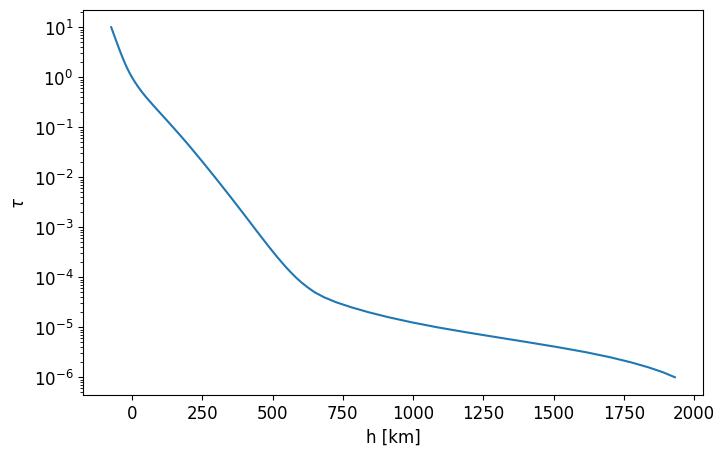

In [5]:
plt.figure(figsize=default_figsize)
plt.semilogy(z, tau)
plt.xlabel("h [km]")
plt.ylabel("$\\tau$")

In [6]:
# Sta bi bilo h = 0 km? To treba da bude neka referentna visina u atmosferi. 
# Uglavnom (99% slucajeva) uzimamo da je h=0 km tamo gde je tau = 1 na referentnoj
# talasnoj duzini

# Iz nekog razloga, opticka dubina na log skali se ponasa kao visina
# Zato cesto plotujemo strukturu zvezdanih atmosfera na skali log tau!!!

Text(0, 0.5, 'T [K]')

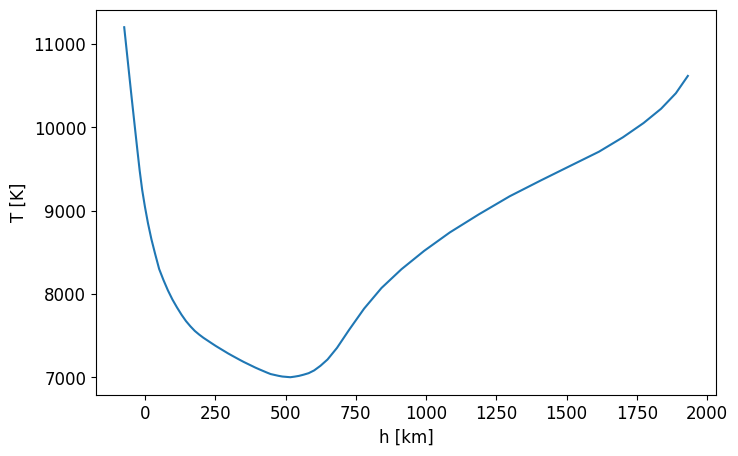

In [ ]:
T = atmos[2] #+ 2500.0 # isprobati na kraju
plt.figure(figsize=default_figsize)
plt.plot(z, T)
plt.xlabel("h [km]")
plt.ylabel("T [K]")

Text(0, 0.5, 'Pritisak gasa [Pa]')

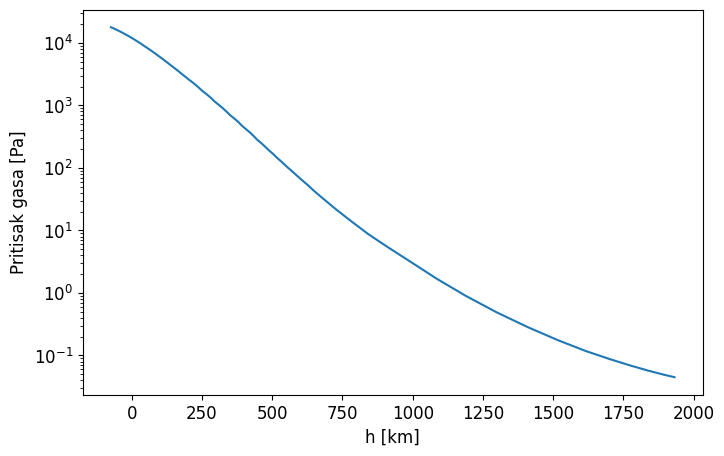

In [9]:
pg = atmos[3] / 10. # konverzija iz dyne / cm^2 u Pa
plt.figure(figsize=default_figsize)
plt.semilogy(z, pg)
plt.xlabel("h [km]")
plt.ylabel("Pritisak gasa [Pa]")

In [10]:
pe = atmos[4] / 10.0

Text(0, 0.5, 'Pritisak elektrona [Pa]')

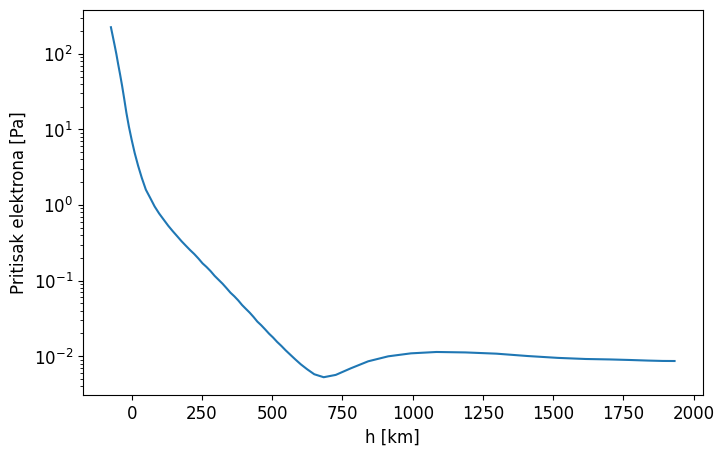

In [11]:
plt.figure(figsize=default_figsize)
plt.semilogy(z, pe)
plt.xlabel("h [km]")
plt.ylabel("Pritisak elektrona [Pa]")

### Imajte u vidu da je za svaki ne-degenerisan gas: $p=nkT$

#### Pitanje 2

Pod pretpostavkom Lokalne Termodinamičke ravnoteže, izračunajte
funkciju izvora za neki relevantan opseg talasnih dužina, za svaku dubinu i uporedite rezultate. Prodiskutujte.

In [12]:
# Pitanje za 6-cu: Cemu je jednaka funkcija izvora u LTR? Jednaka je 
# PLANKOVOJ FUNKCIJIIII # Plankova funkcija zavisid od lambda i T 

def planck(llambda, T):
    h = 6.626E-34
    c = 2.997E8
    k = 1.38E-23
    
    B = 2*h*c*c / llambda**5.0 / (np.exp(h*c/llambda/k/T) - 1.0)
    
    return B

In [13]:
llambda = np.linspace(100,1000,91) # nm! hocemo u m, da bude SI
llambda *= 1E-9
S = planck(llambda[None,:], T[:,None])

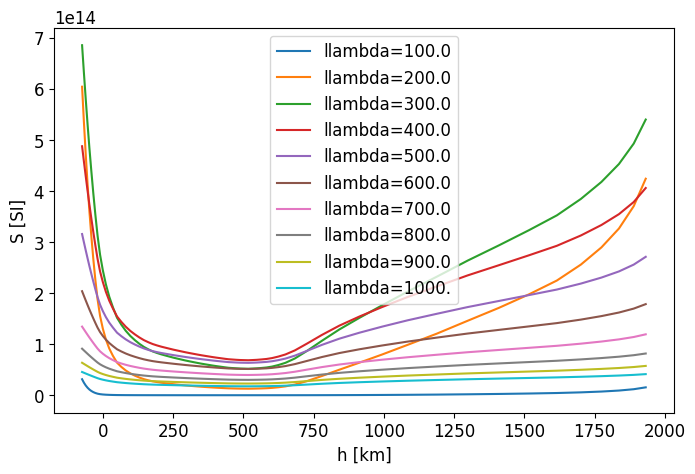

In [14]:
plt.figure(figsize=default_figsize)
for l in range(0,91,10):
    plt.plot(z, S[:,l],label='llambda='+str(llambda[l]*1E9)[:5])
plt.xlabel("h [km]")
plt.ylabel("S [SI]")
plt.legend()

Text(0, 0.5, 'S [SI]')

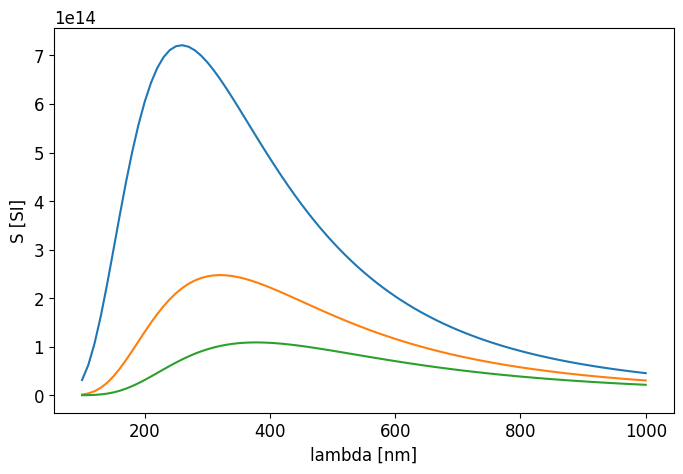

In [15]:
# Da se uverimo da S jako zavisi od llambda, mali plot:
plt.figure(figsize=default_figsize)
plt.plot(llambda*1E9, S[-1,:])
plt.plot(llambda*1E9, S[-11,:])
plt.plot(llambda*1E9, S[-21,:])
plt.xlabel("lambda [nm]")
plt.ylabel("S [SI]")

In [16]:
# Sledeci korak bi bio da nadjemo neprozracnost na svim ovim talasnim duzinama
# da bismo nasli skalu optickih dubina, da bismo integralili JPZ, da bismo dobili 
# spektar!

# Medjutim, naci neprozracnost je jako tesko...

# Ako se zadrzimo na nH, nH- and ne

### Nas sledeci zadatak je da izracunamo (procenimo) neprozracnost usled apsorpcije neutralnog vodonika (Lajmanov kontinuum, Balmerov kontinuum, Pasenov kontinuum). 

### (Zatim cemo ukljuciti i H-)

In [17]:
# Za to nam treba koncentracija neutralnog vodonika
# Rekli smo da pg = Nt*k*T 
k = 1.38E-23
Nt = pg / k / T
#print (Nt)

#### Mi cemo pretpostaviti da ova koncetrancija predstavlja samo koncentraciju elektrona, neutralnog vodonika i protona

#### $n_e = n_p$

#### $N_t = n_{H0} + n_e + n_p$ 

#### $\frac{n_e n_p}{n_{H0}} = f(T)$

In [18]:
def resi_ne_H(Nt, T):
    
    h = 6.626E-34
    k = 1.38E-23
    me = 9.1E-31
    Ei = 13.6 * 1.6E-19 
    
    KT = (2.0 * 3.14 * me * k * T / h / h) ** 1.5 * np.exp(-Ei/k/T)
    
    ne = -KT + np.sqrt(KT*KT + Nt * KT)
    nHp = ne
    nH = Nt - 2*ne

    return nH, nHp, ne

def resi_ne_Mg(Nt, T):
    
    h = 6.626E-34
    k = 1.38E-23
    me = 9.1E-31
    Ei = 7.64 * 1.6E-19 
    
    KT = (2.0 * 3.14 * me * k * T / h / h) ** 1.5 * np.exp(-Ei/k/T)
    
    ne = -KT + np.sqrt(KT*KT + Nt * KT)
    nHp = ne
    nH = Nt - 2*ne

    return nH, nHp, ne

### Za malo komplikovaniji korak ce nam trebati tabla. Treba da pokazemo da, ako razmatramo sledece elemente:
### $n_H$, $n_{H+}$, $n_{Mg}$, $n_{Mg+}$, $n_e$, imamo 5 jednacina

In [19]:
# Mala sekcija o particionoj funkciji za Mg. Ovo racunamo tako sto koristimo rad Irwina, koji daje 
# aproksimaciju u ovoj formi lnQ = sum = a_i (ln T)^^i.
# Rad se moze naci na: https://articles.adsabs.harvard.edu/pdf/1981ApJS...45..621I

def part_f_Mg(T, j):
    
    a = np.zeros([2,6])
    a[0] = [-2.36123647E+03, 1.53666552E+03, -3.99573894E+02, 5.18934127E+01, -3.36616446E+00, 8.72505398E-02]
    a[1] = [-4.34874146E+02, 2.76201198E+02, -6.99216802E+01, 8.83345154E+00, -5.56915833E-01,1.40181117E-02]
    
    #print (a)
    lnT = np.log(T)
    
   # print(lnT)
    
    lnQ = 0.0
    for i in range(0,6):
        lnQ += a[j][i] * (lnT ** i)
        
    #print(lnQ)
    
    return np.exp(lnQ)

In [20]:
# Definisi funkciju koju cemo posle da resimo solveom:

def chemeq(n, args):
    
    # args are Nt, and T
    Nt, f1, f2, A, e_guess = args
    
    F = np.zeros(5)
    # Normalizujemo u odnosu na neku njihovu tipicnu koncentraciju
    F[0] = (n[0] + n[1] + n[2] + n[3] + n[4] - Nt) / Nt
    F[1] = (n[0]*f1 - n[1]*n[4])/Nt/f1
    F[2] = (n[2]*f2 - n[3]*n[4])/Nt/A/f2/1E-2 
    F[3] = (n[4] - n[1] - n[3]) / e_guess
    F[4] = (n[2] + n[3] - A * (n[0]+n[1])) / Nt / A
    
    return F
    

In [21]:
from scipy.optimize import fsolve

    
def resi_ion(Nt, T):
    
    h = 6.626E-34
    k = 1.38E-23
    me = 9.1E-31
    EiH = 13.6 * 1.6E-19 
    EiMg = 7.64 * 1.6E-19
    
    A_mg = 10**(7.58-12.0) * 2.6 # Da imitiramo i gvozdje
    
    f1 = (2.0 * 3.14 * me * k * T / h / h) ** 1.5 * np.exp(-EiH/k/T)
    f2 = (2.0 * 3.14 * me * k * T / h / h) ** 1.5 * np.exp(-EiMg/k/T) * 2.0 * 1.0/1.0 #part_f_Mg(T,1) / part_f_Mg(T,0)
    
    #print(f1, f2)

    bla1 = resi_ne_H(Nt, T)
    bla2 = resi_ne_Mg(Nt * A_mg, T)
    
    initial_values = np.array([bla1[0], bla1[1], bla2[0], bla2[1], bla1[2]+bla2[2]])
    
    solution = fsolve(chemeq, initial_values, args=np.array([Nt, f1, f2, A_mg, bla1[2]+bla2[2]]), xtol = 1E-19, maxfev = 100000, full_output=1)

    # Testirajmo konacno resenje:
    #print("Residuals of the solution:", chemeq(solution[0], np.array([Nt, f1, f2, A_mg, bla1[2]+bla2[2]])) )
    
    return solution[0]
    

In [22]:
p_test = 1E5
T_test = 6000.0
test = resi_ion(p_test/k/T_test, T_test)
print(test)
# Testirajmo ovo za Nt 
print(np.sum(test), p_test/k/T_test)

[1.20743284e+24 3.72501787e+19 1.65894859e+19 1.02768019e+20
 1.40018198e+20]
1.2077294685990338e+24 1.2077294685990338e+24


In [23]:
# Nakon godina debagovanja, resili smo ovaj problem uz pametnu normalizaciju!!!!

#### Sledeci korak je da uporedimo koncentracije elektrona izracunate samo na osnovu vodonika i uzimajuci u obzir i magnesium. A onda cemo to uporediti i sa koncentracijom elektrona iz modela atmosfere koji nam je dat

In [24]:
ND = len(T)
ne_samo_H = np.zeros(ND)
ne_sa_Mg = np.zeros(ND)

# Ovo ce nam trebati kasnije
nH_sa_Mg = np.zeros(ND)
nHp_sa_Mg = np.zeros(ND)

for d in range(0,ND):

    ne_samo_H[d] = resi_ne_H(pg[d]/k/T[d], T[d])[2]
    pops = resi_ion(pg[d]/k/T[d], T[d])
    nH_sa_Mg[d] = pops[0]
    nHp_sa_Mg[d] = pops[1]
    ne_sa_Mg[d] = pops[4]
     

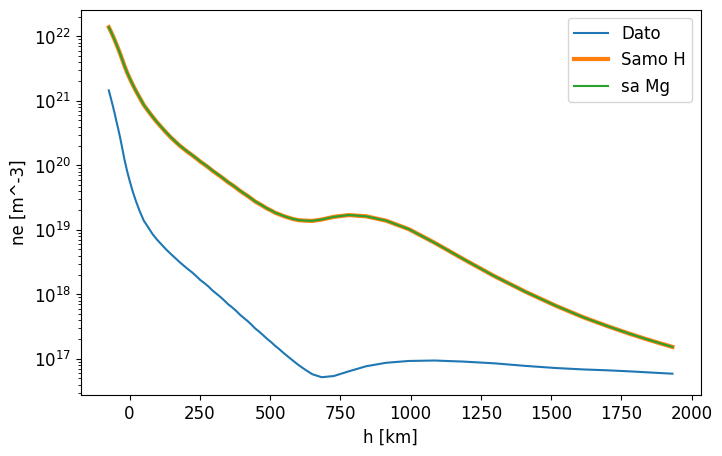

In [26]:
# Uporedimo nase ne, sa ne datim u modelu atmosfere
ne = pe/k/T
plt.figure(figsize=default_figsize)
plt.semilogy(z, ne, label='Dato')
plt.semilogy(z, ne_samo_H, linewidth=3, label = 'Samo H')
plt.semilogy(z, ne_sa_Mg, label = 'sa Mg')
plt.xlabel("h [km]")
plt.ylabel("ne [m^-3]")
plt.legend()

### Zasto ovo ovako izgleda? 

- Na bas dubokim slojevima, vodonik je solidno jonizovan (1%), pa svi elektroni u principu dolaze od njega
- Na visim slojevima vodonik je slabo jonizovan, pa elektroni uglavnom dolaze od metala, koje mi nemamo :(
- Na najvisim slojevima, svi e- bi trebalo da dodju od vodonika, ali je vodonik manje jonizovan nego sto Sahina raspodela sugerise, usled ne-LTR efekata

#### Sledece sto zelimo je da procenimo koncentraciju negativnog jona vodonika. 

#### Pretpostavicemo da negativnog jona vodonika ima toliko malo da on ne moze da poremeti onu gore hemijsku tj jonizacionu ravnotezu 

#### Pa cemo imati da je $n_{H-} = n(H) * n_e / f_{Hm}$

In [27]:
def estimate_H_minus(nH, ne, T):

    h = 6.626E-34
    k = 1.38E-23
    me = 9.1E-31
    EiHm = 0.75 * 1.6E-19

    fHm = (2.0 * 3.14 * me * k * T / h / h) ** 1.5 * np.exp(-EiHm/k/T) * 4.0

    return nH*ne / fHm
    

#### Ovde mozemo isprobavati razne vrednosti koje nam vraca resi_ion, da vidimo kako koncentracija negativnog jona vodonika zavisi od pritiska i temperature

In [28]:
p_test = 1E5
T_test = 6000.0
test = resi_ion(p_test/k/T_test, T_test)
print(test)
# Testirajmo ovo za Nt 
print('%1.4e.' %  estimate_H_minus(test[0], test[4], T_test))

[1.20743284e+24 3.72501787e+19 1.65894859e+19 1.02768019e+20
 1.40018198e+20]
1.6092e+17.


#### Nemojte zaboraviti da ovih "mizernih" 1E17 atoma treba uporediti sa populacijom vodonika u 2 pobudjenom (tj n = 3) stanju. 

#### To cemo uraditi u sledecem koraku, prvi korak je da dobijemo opticku dubinu na svim zeljenim talasnim duzinama. Zatim cemo na svakoj talasnoj duzini koristiti $S$ i $\tau_\lambda$ da izracunamo izlazni intenzitet. >>Spektar<< je onda izlazni intenzitet u zavisnosti od talasne duzine.

#### Sledeci korak je da izracunamo populacije neutralnih atoma vodonika pa da saberemo neprozracnost usled neutralnog vodonika i negativnog jona vodonika

####  Mozemo samo i da primenimo jednacinu 8.7 iz Gray-a ( 2005)

#### Prvo, za neutralni vodonik, setimo se da nam je nam je: $\chi_\lambda = n_1 * \sigma_1(\lambda) + n_2 * \sigma_2(\lambda) + .... $

#### Sledeci zadatak! Resavamo JPZ na 500 nm na datoj skali opticke dubine, da dobijemo izlazni intenzitet! 

In [29]:
Ei = 13.6 * 1.60218e-19
E1 = 0.0
E2 = Ei * (1.0 - 1/2.0**2)
E3 = Ei * (1.0 - 1/3.0**2)
E4 = Ei * (1.0 - 1/4.0**2)
print (E1/1.60218e-19, E2/1.60218e-19, E3/1.60218e-19, E4/1.60218e-19)

0.0 10.2 12.088888888888887 12.749999999999998


### Bolcmanova raspodela

### $n_i = n \frac{g_i e^{-E_i/kT}}{U}$

In [30]:
n1 = nH_sa_Mg
n2 = nH_sa_Mg * np.exp(-E2/k/T) * 8.0 / 2.0
n3 = nH_sa_Mg * np.exp(-E3/k/T) * 18.0 / 2.0
n4 = nH_sa_Mg * np.exp(-E4/k/T) * 32.0 / 2.0

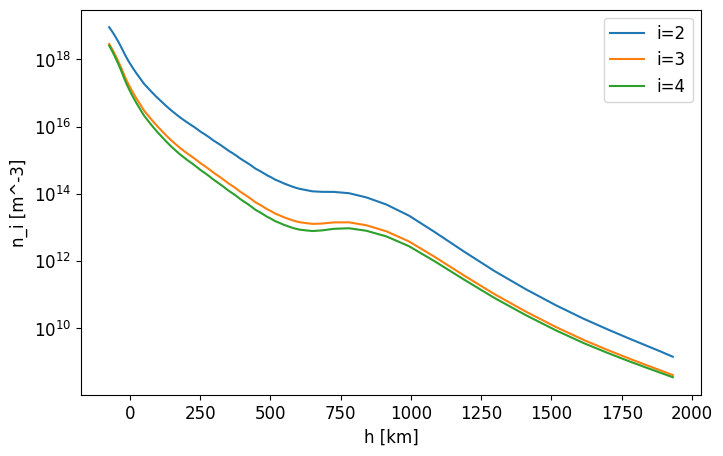

In [31]:
plt.figure(figsize=default_figsize)
#plt.semilogy(z, n1, label='i=1')
plt.semilogy(z, n2, label='i=2')
plt.semilogy(z, n3, label = 'i=3')
plt.semilogy(z, n4, label = 'i=4')
plt.xlabel("h [km]")
plt.ylabel("n_i [m^-3]")
plt.legend()

In [32]:
def sigma(i,llambda):
    
    # Sustina ove funkcije je da je sigma_lambda = const * lambda^3 ali je 0 za lambda > lambda_crit

    # Ovde je bilo nesto sto smo uzeli iz Emersona, ali cemo primeniti Graya:
    
    # Ovo je CGS
    #e = 4.8032042510E-10
    #Ryd = 1.097373156853955E5 
    #e0 = 7.957747154594775607E-2
    #me = 9.1093818872E-28
    
    
    # Ovo je SI 
    h = 6.626E-34
    cc = 2.99792458E8
    
    #fct=(2.0*e*Ryd)**2.0/(np.sqrt(27.0)*np.pi*e0*me*cc*cc)

    # J-na 8.4 iz Graya kaze: alpha (efikasni presek) = alfa0 * gauntfaktor * lambda**3.0 / n**5. u cm^2
    # pp da je gauntfaktor = 1
    
    Eion = 13.6 * 1.60218e-19
    Ei = Eion / i**2.0
    
    llambda_crit = h * cc / Ei * 1E10 # u angstremima

    if (llambda > llambda_crit):
        return 0

    else:
        return 1.04E-30 * llambda**3.0 / i**5.0

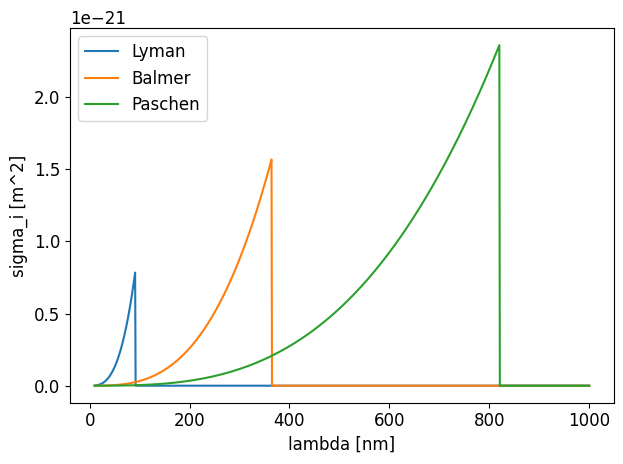

In [33]:
llambda = np.linspace(10,1000,991) * 1E-9

Nlambda = len(llambda)
sigma_ll1 = np.zeros(Nlambda) # Niz koji cuva vrednosti efikasnog preseka za jonizaciju vodonika 
                              # sa stanja i = 0 u zavisnosti od lambda
sigma_ll2 = np.zeros(Nlambda)
sigma_ll3 = np.zeros(Nlambda)

for i in range(Nlambda):
    sigma_ll1[i] = sigma(1.0,llambda[i]*1E10)
    sigma_ll2[i] = sigma(2.0,llambda[i]*1E10)
    sigma_ll3[i] = sigma(3.0,llambda[i]*1E10)

plt.plot(llambda*1E9,sigma_ll1, label='Lyman')
plt.plot(llambda*1E9,sigma_ll2, label='Balmer')
plt.plot(llambda*1E9,sigma_ll3, label='Paschen')
plt.xlabel("lambda [nm]")
plt.ylabel("sigma_i [m^2]")
plt.legend()
plt.tight_layout()

(10.0, 200.0)

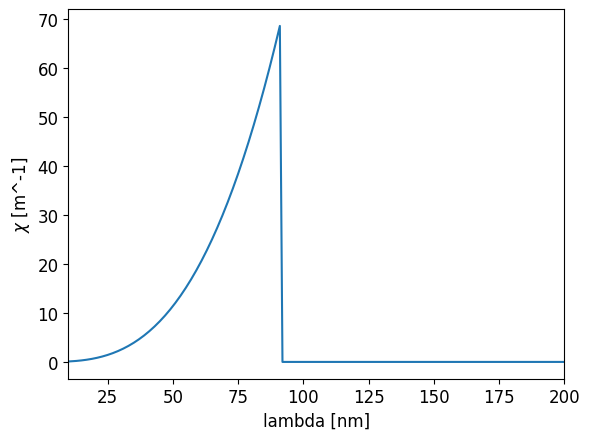

In [34]:
# Da bismo dobili neprozracnost, tj. koeficijent apsorpcije, mnozimo ovaj efikasni presek sa
# odgovarajucom koncentracijom

chi1 = sigma_ll1[None,:] * n1[:,None]
chi2 = sigma_ll2[None,:] * n2[:,None]
chi3 = sigma_ll3[None,:] * n3[:,None]

plt.plot(llambda*1E9,chi1[-1,:])
plt.xlabel("lambda [nm]")
plt.ylabel("$\\chi$ [m^-1]")
plt.xlim([10, 200])

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_12366/3722443116.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi$ [m^-1]")


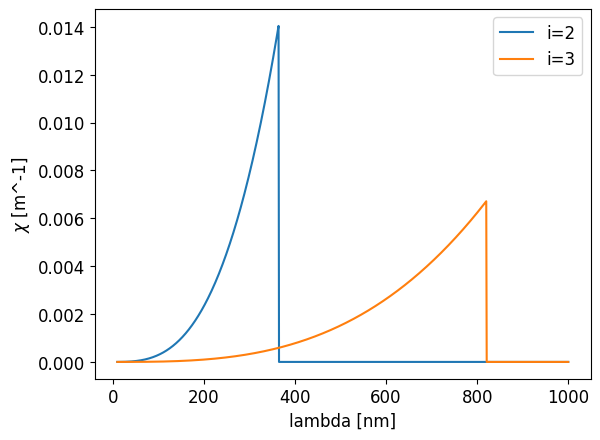

In [35]:
plt.plot(llambda*1E9,chi2[-1,:], label='i=2')
plt.plot(llambda*1E9,chi3[-1,:], label='i=3')
plt.xlabel("lambda [nm]")
plt.ylabel("$\chi$ [m^-1]")
plt.legend()

In [36]:
# Treba da integralimo neprozracnost da dobijemo opticku dubinu na svakoj talasnoj duzini:
chi = chi1 + chi2 + chi3
tau_lambda = np.zeros([71,Nlambda])
tau_lambda[0,:] = tau[0]
for d in range (1,71):
    
    tau_lambda[d,:] = tau_lambda[d-1,:] + (z[d-1,None] - z[d,None]) * 1E3 * (chi[d-1,:] + chi[d,:]) * 0.5

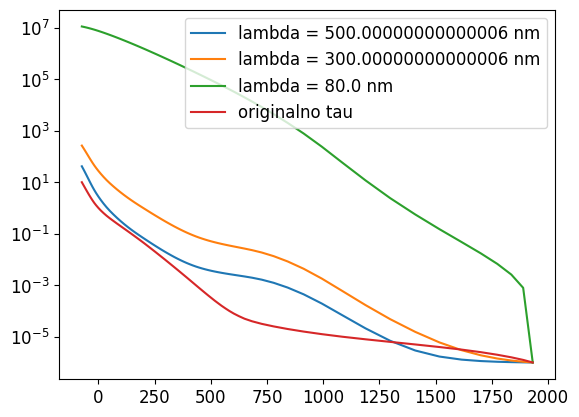

In [37]:
plt.semilogy(z,tau_lambda[:,490], label='lambda = '+str(llambda[490]*1E9)+' nm')
plt.semilogy(z,tau_lambda[:,290], label='lambda = '+str(llambda[290]*1E9)+' nm')
plt.semilogy(z,tau_lambda[:,70], label='lambda = '+str(llambda[70]*1E9)+' nm')
plt.semilogy(z, tau, label = 'originalno tau')
plt.legend()

### I konacno, formalno resenje:

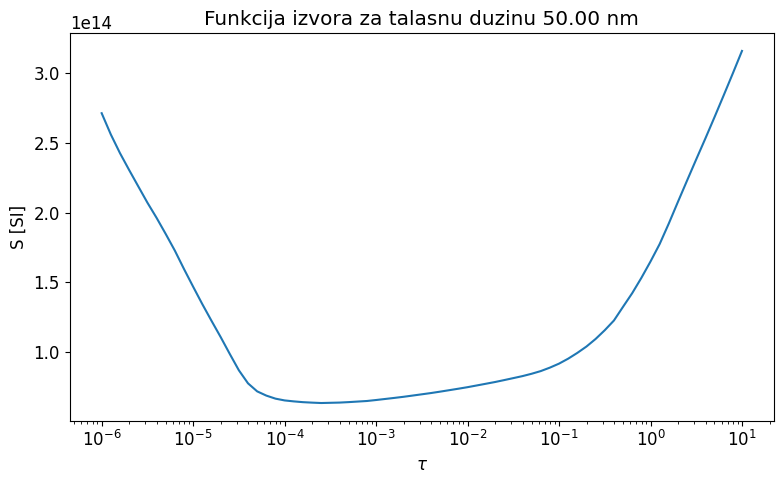

In [38]:
l_primer = 40
plt.figure(figsize=default_figsize)
plt.semilogx(tau, S[:,l_primer])
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")
plt.title("Funkcija izvora za talasnu duzinu "+str(llambda[40]*1E9)[:5]+" nm")
plt.tight_layout()

#### Resavanje jednacine prenosa zracenja znaci resavanje integrala:

#### $$I^+ = \int_0^{\infty} S(t) e^{-t} dt$$

In [39]:
## Hajde da isplotujemo S(t) e^{-t}
#plt.figure(figsize=default_figsize)
#plt.semilogx(tau, S[:,l_primer]*np.exp(-tau))
#plt.xlabel("$\\tau$")
#plt.ylabel("S [SI]")

In [40]:
## Ovde ima jedna zamka, prebacujemo integral u skalu logtau

## $$I^+ = \int_0^{\infty} S(t) e^{-t} t d\ln t$$

In [41]:
#plt.figure(figsize=default_figsize)
#plt.semilogx(tau, S[:,l_primer]*np.exp(-tau)*tau)
#plt.xlabel("$\\tau$")
#plt.ylabel("S [SI]")

#### Sada bismo, intiutitivno samo integralili poditegralnu funkciju, npr. trapezoidno, i cica-mica i gotova prica

#### Ne, umesto toga cemo krenuti od najdubljeg sloja i resavati jednacinu prenosa sa pretpostavkom konstantne funkcije izvora, sloj po sloj.

#### NE PRETPOSTAVLJAMO da je funkcija izvora svuda konstantna nego da je samo konstantna unutar datog sloja

In [42]:
def formalno_resenje(S, tau):
    
    ND = len(S)
    I = np.zeros(ND)
    
    # Krecemo od najdublje tacke
    I[ND-1] = S[ND-1] # Prakticno termodinamicka ravnoteza, radi dobro 
                      # ako je poslednja tacka na velikom tau
        
    for i in range(ND-1,0,-1):
        
        S_srednje = (S[i] + S[i-1]) * 0.5
        delta_tau = tau[i-1] - tau[i]
        
        I[i-1] = I[i] * np.exp(delta_tau) + S_srednje * (1.0 - np.exp(delta_tau))
    
    return I # ovo je intenzitet na svakoj dubini. I[0] je izlazni intenzitet

In [43]:
I = formalno_resenje(S[:,l_primer],tau)
print("%1.7e" % I[0])

1.5111806e+14


Text(0, 0.5, 'S [SI]')

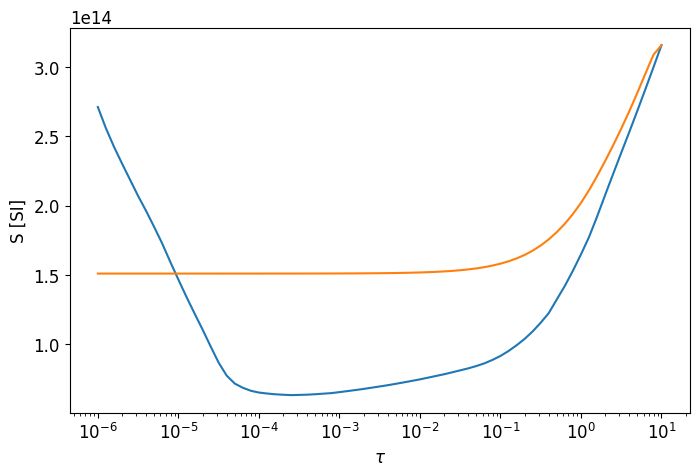

In [44]:
plt.figure(figsize=default_figsize)
plt.semilogx(tau, S[:,l_primer], label='S')
plt.semilogx(tau, I, label = 'Intenzitet')
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")

In [45]:
from tqdm import tqdm

In [46]:
spektar = np.zeros(Nlambda)

S = planck(llambda[None,:], T[:,None])

for l in tqdm(range(0,Nlambda)):
    I = formalno_resenje(S[:,l],tau_lambda[:,l])
    spektar[l] = I[0]

100%|██████████| 991/991 [00:00<00:00, 4217.72it/s]


Text(0, 0.5, 'I [SI]')

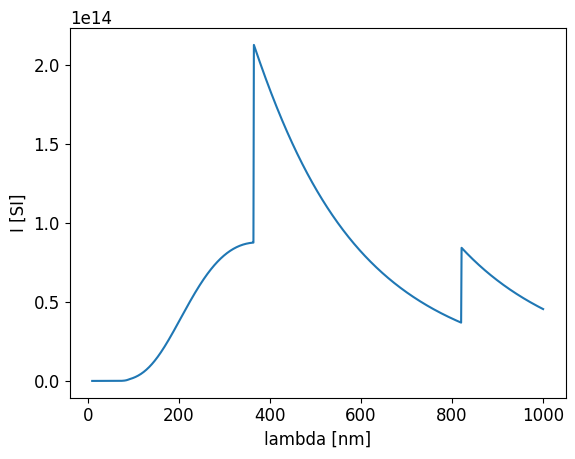

In [47]:
# Konacno nas spektar

plt.plot(llambda*1E9, spektar)
plt.xlabel("lambda [nm]")
plt.ylabel("I [SI]")

#### Moramo da dodamo neprozracnost usled negativnog jona vodonika. Hajde da prvo domamo b-f

In [48]:
# Jednacina 8.11 
# Jednacina 8.12 iz Gray knjige

def crossection_hminus(llambda, T, ne):

    a = np.zeros(7)
    a[0] = 0.11996
    a[1] = -1.18E-5
    a[2] = 2.62E-6
    a[3] = -4.4E-10
    a[4] = 3.239E-14
    a[5] = -1.39E-18
    a[6] = 2.78E-23

    exp = np.arange(7)
    alpha_bf = np.sum(a * llambda ** exp) * 1E-18

    k = 1.38E-23
    Pe = k * ne * T
    theta = 5040/T
    alpha_per_neutral_hydrogen = 4.158E-10 * alpha_bf * Pe * theta ** 2.5 * 10 ** (0.754*theta) * 1E-4
    return alpha_per_neutral_hydrogen


In [49]:
chi_hm = np.zeros([len(T), len(llambda)])

for d in range(0,len(T)):
    for l in range(0, len(llambda)):

        chi_hm[d,l] = crossection_hminus(llambda[l] * 1E10, T[d], ne_sa_Mg[d]) * nH_sa_Mg[d]

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_12366/3022641595.py:6: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi$ [m^-1]")


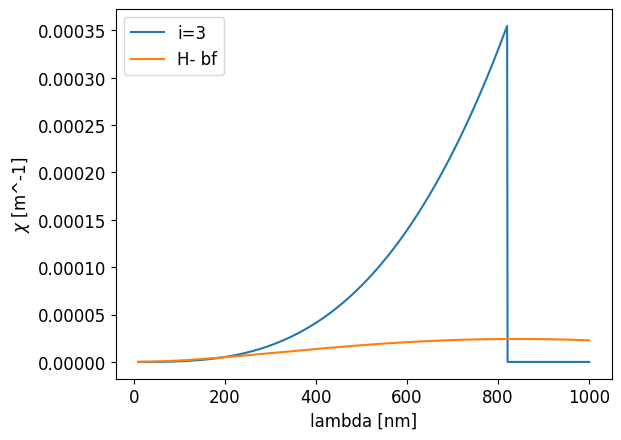

In [50]:
#plt.plot(llambda*1E9,chi1[-1,:], label='Jonizacija sa i = 1')
#plt.plot(llambda*1E9,chi[-1,:], label='i=2')
plt.plot(llambda*1E9,chi3[-11,:], label='i=3')
plt.plot(llambda*1E9,chi_hm[-11,:], label='H- bf')
plt.xlabel("lambda [nm]")
plt.ylabel("$\chi$ [m^-1]")
plt.legend()

In [51]:
chi = chi1 + chi2 + chi3 + chi_hm * 10.0 # Varali smo faktor 10 - ne znamo gde je greska

# Treba da integralimo neprozracnost da dobijemo opticku dubinu na svakoj talasnoj duzini:

tau_lambda = np.zeros([71,Nlambda])
tau_lambda[0,:] = 1E-8
for d in range (1,71):
    
    tau_lambda[d,:] = tau_lambda[d-1,:] + (z[d-1,None] - z[d,None]) * 1E3 * (chi[d-1,:] + chi[d,:]) * 0.5

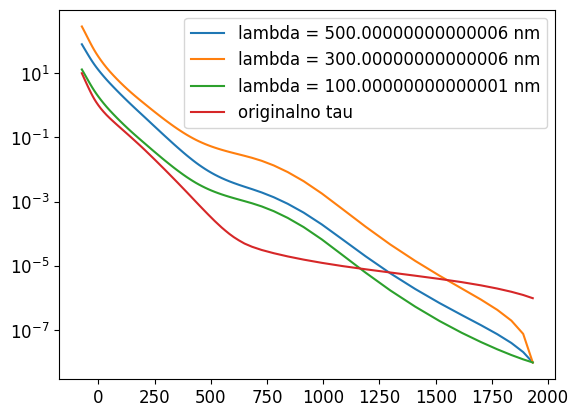

In [52]:
plt.semilogy(z,tau_lambda[:,490], label='lambda = '+str(llambda[490]*1E9)+' nm')
plt.semilogy(z,tau_lambda[:,290], label='lambda = '+str(llambda[290]*1E9)+' nm')
plt.semilogy(z,tau_lambda[:,90], label='lambda = '+str(llambda[90]*1E9)+' nm')
plt.semilogy(z, tau, label = 'originalno tau')
plt.legend()

In [53]:
spektar = np.zeros(Nlambda)

S = planck(llambda[None,:], T[:,None])

for l in tqdm(range(0,Nlambda)):
    I = formalno_resenje(S[:,l],tau_lambda[:,l]*10.0)
    spektar[l] = I[0]

100%|██████████| 991/991 [00:00<00:00, 4045.15it/s]


Text(0, 0.5, 'I [SI]')

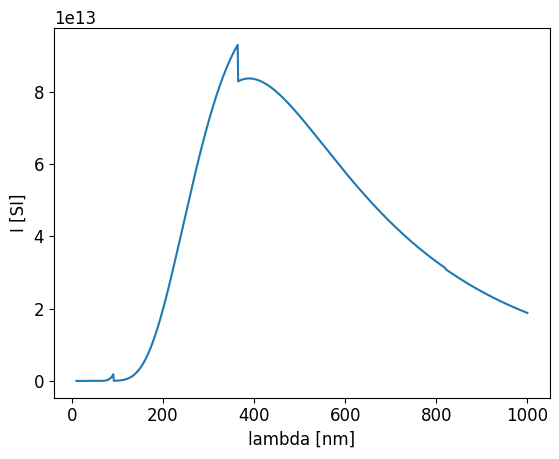

In [54]:
# Konacno nas spektar

plt.plot(llambda*1E9, spektar)
plt.xlabel("lambda [nm]")
plt.ylabel("I [SI]")